In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

initialize runids

In [6]:
runids = [
    f'cal_gt{i}' for i in np.arange(1, 81+1, 1)
]

# runids = [
#     # 'val_gt21',
#     # 'val_gt22',
#     'val_gt23',
# ]

Load in calibration data

In [7]:
# load in Erikson data
df_erikson1 = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson2\Temp_arrays USGS-UCSC_Oberle\BI_T-1_processed.csv")), 
    parse_dates=['date_time'],
)

Define function to compute RMSE for each layer for each model run.

In [8]:
def compute_RMSE(run_id, df_val_data):
    
    # load in the modelling results
    fname_model_data = "data/" + run_id + "_ground_temperature_timeseries.csv"

    df_gt = pd.read_csv(fname_model_data, parse_dates=['time'])

    # Lets add some columns to convert to Celcius
    erikson_colnames = df_val_data.columns[1:]
    
    colnames = [
        "temp_0.0m[K]","temp_0.25m[K]","temp_0.5m[K]","temp_0.75m[K]",
        "temp_1.0m[K]","temp_1.25m[K]","temp_1.5m[K]","temp_1.75m[K]",
        "temp_2.0m[K]","temp_2.25m[K]","temp_2.5m[K]","temp_2.75m[K]", "temp_2.95m[K]",
        "temp_3.0m[K]","temp_3.25m[K]","temp_3.5m[K]","temp_3.75m[K]",
        "temp_4.0m[K]","temp_4.25m[K]","temp_4.5m[K]","temp_4.75m[K]"
    ]
    
    for colname in colnames:
        
        df_gt[f'{colname[:-3]}[C]'] = df_gt[colname] - 273.15
     
    # remove repeated years from model data
    indice = np.max(df_gt[df_gt.time == df_gt.time.values[0]].index)
    df_gt = df_gt[df_gt.index >= indice]
        
    # make sure both dataframes span the same time frame
    t_start = np.max((df_gt.time.values[0], df_val_data.date_time.values[0]))
    # t_end = np.min((df_gt.time.values[-1], df_val_data.date_time.values[-1]))
    
    t_end = pd.to_datetime("2016-08-18")  # hard cutoff, since data temperature data obtained after this is incomplete

    mask1 = (df_gt['time'] >= t_start) * (df_gt['time'] <= t_end)    
    df1 = df_gt[mask1]

    mask2 = (df_val_data['date_time'] >= t_start) * (df_val_data['date_time'] <= t_end)    
    df2 = df_val_data[mask2]
    
    # print(df1.time)
    # print(df2.date_time)
    
    # compute RMSE per soil layer
    colnames1 = [
        "temp_0.0m[C]","temp_0.25m[C]","temp_0.5m[C]",
        "temp_1.0m[C]","temp_1.25m[C]","temp_1.5m[C]","temp_1.75m[C]",
        "temp_2.0m[C]","temp_2.25m[C]","temp_2.5m[C]","temp_2.75m[C]",
        "temp_3.0m[C]","temp_3.25m[C]","temp_3.5m[C]","temp_3.75m[C]",
        "temp_4.0m[C]","temp_4.25m[C]",
    ]
    colnames2 = [
        'dpth0cm', 'dpth25cm', 'dpth50cm', 
        'dpth100cm', 'dpth125cm', 'dpth150cm', 'dpth175cm', 
        'dpth200cm', 'dpth225cm', 'dpth250cm', 'dpth275cm', 
        'dpth300cm', 'dpth325cm', 'dpth350cm', 'dpth375cm',
        'dpth400cm', 'dpth425cm'
    ]
    
    RMSEs = {'runid':run_id}
    
    
    for c1, c2 in zip(colnames1, colnames2):
        
        values1 = df1[c1].values
        values2 = df2[c2].values
        
        N = len(values1)
        
        RMSE = np.sqrt(1 / N * np.sum((values1 - values2)**2))
        
        RMSEs[c2] = RMSE
        
    return RMSEs
    

In [9]:
for i, run_id in enumerate(runids):

    RMSEs = compute_RMSE(run_id, df_erikson1)
        
    if i == 0:
        
        df_rmse = pd.DataFrame(RMSEs, index=[0])

    else:
        
        df_rmse = df_rmse._append(RMSEs, ignore_index=True)
        
    print(f"Finished {run_id}")
        
display(df_rmse)

Finished cal_gt1
Finished cal_gt2
Finished cal_gt3
Finished cal_gt4
Finished cal_gt5
Finished cal_gt6
Finished cal_gt7
Finished cal_gt8
Finished cal_gt9
Finished cal_gt10
Finished cal_gt11
Finished cal_gt12
Finished cal_gt13
Finished cal_gt14
Finished cal_gt15
Finished cal_gt16
Finished cal_gt17
Finished cal_gt18
Finished cal_gt19
Finished cal_gt20
Finished cal_gt21
Finished cal_gt22
Finished cal_gt23
Finished cal_gt24
Finished cal_gt25
Finished cal_gt26
Finished cal_gt27
Finished cal_gt28
Finished cal_gt29
Finished cal_gt30
Finished cal_gt31
Finished cal_gt32
Finished cal_gt33
Finished cal_gt34
Finished cal_gt35
Finished cal_gt36
Finished cal_gt37
Finished cal_gt38
Finished cal_gt39
Finished cal_gt40
Finished cal_gt41
Finished cal_gt42
Finished cal_gt43
Finished cal_gt44
Finished cal_gt45
Finished cal_gt46
Finished cal_gt47
Finished cal_gt48
Finished cal_gt49
Finished cal_gt50
Finished cal_gt51
Finished cal_gt52
Finished cal_gt53
Finished cal_gt54
Finished cal_gt55
Finished cal_gt56
F

,runid,dpth0cm,dpth25cm,dpth50cm,dpth100cm,dpth125cm,dpth150cm,dpth175cm,dpth200cm,dpth225cm,dpth250cm,dpth275cm,dpth300cm,dpth325cm,dpth350cm,dpth375cm,dpth400cm,dpth425cm
0,cal_gt1,8.645385,3.362727,0.278754,2.444543,2.759177,3.346819,3.570696,3.703095,3.847849,3.672301,3.338481,2.102472,1.121973,0.636608,0.654816,0.785390,0.921196
1,cal_gt2,8.645385,3.362727,0.278754,2.444543,2.759177,3.346819,3.570696,3.703095,3.847849,3.672301,3.338481,2.102472,1.121973,0.636608,0.654816,0.785390,0.921196
2,cal_gt3,8.645385,3.362727,0.278754,2.444543,2.759177,3.346819,3.570696,3.703095,3.847849,3.672301,3.338481,2.102472,1.121973,0.636608,0.654816,0.785390,0.921196
3,cal_gt4,8.623352,3.151630,0.250509,2.465646,2.773154,3.352736,3.572689,3.701164,3.844345,3.667595,3.333554,2.097999,1.118679,0.636409,0.657199,0.787572,0.922886
4,cal_gt5,8.623352,3.151630,0.250509,2.465646,2.773154,3.352736,3.572689,3.701164,3.844345,3.667595,3.333554,2.097999,1.118679,0.636409,0.657199,0.787572,0.922886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,cal_gt77,8.368012,5.331684,2.068705,0.341685,0.313754,0.360826,0.599665,0.957247,1.331106,1.580740,1.548421,0.742553,0.266047,0.549725,0.868979,0.943927,1.030462
77,cal_gt78,8.368012,5.331684,2.068705,0.341685,0.313754,0.360826,0.599665,0.957247,1.331106,1.580740,1.548421,0.742553,0.266047,0.549725,0.868979,0.943927,1.030462
78,cal_gt79,8.355218,5.232553,1.944655,0.309566,0.286100,0.365439,0.609067,0.966191,1.339015,1.586190,1.552293,0.743614,0.261501,0.547924,0.868363,0.944013,1.030940
79,cal_gt80,8.355218,5.232553,1.944655,0.309566,0.286100,0.365439,0.609067,0.966191,1.339015,1.586190,1.552293,0.743614,0.261501,0.547924,0.868363,0.944013,1.030940


In [10]:
len(df_rmse.columns[1:])

17

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_44620\2807870724.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


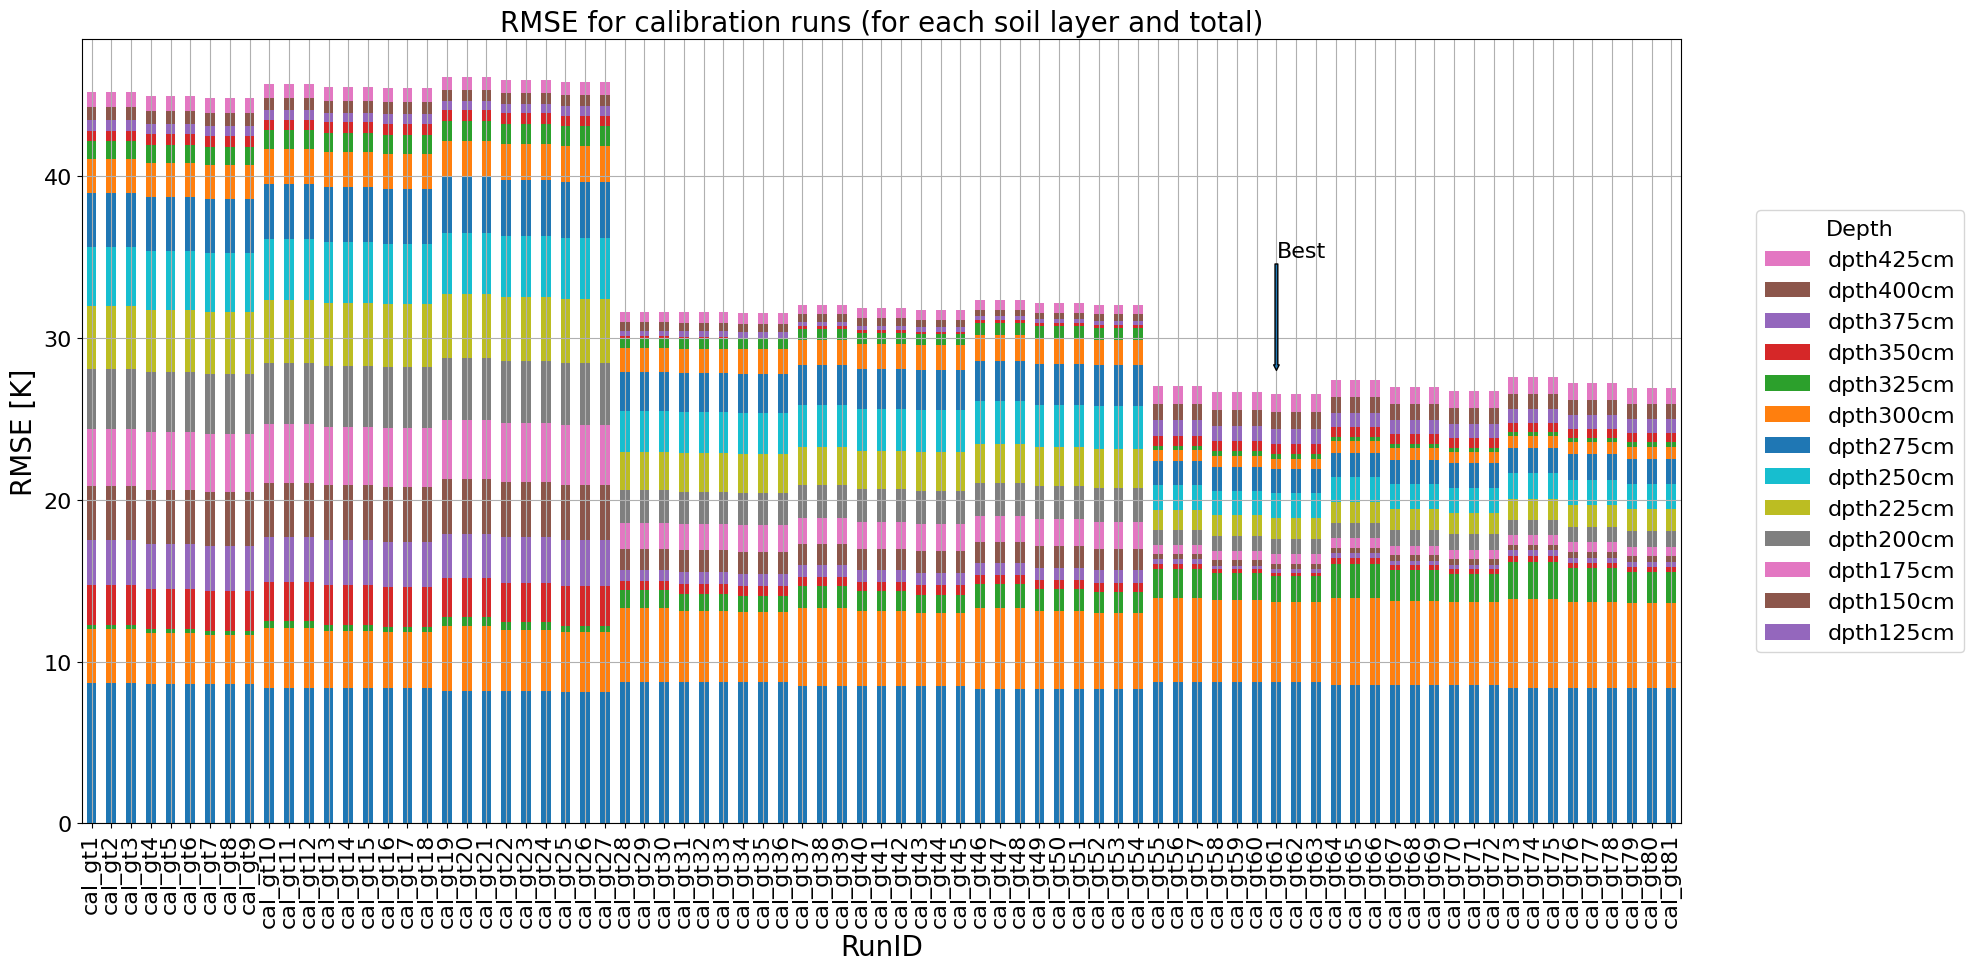

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

if 'total_RMSE' in df_rmse.columns:
    df_rmse.drop('total_RMSE', axis=1, inplace=True)

df_rmse.plot.bar(stacked=True, ax=ax)

ax.set_title("RMSE for calibration runs (for each soil layer and total)")
ax.set_xlabel('RunID')
ax.set_ylabel('RMSE [K]')

ax.set_xticks(np.arange(len(df_rmse)), df_rmse.runid.values)
ax.set_xticklabels(df_rmse.runid.values, rotation=90)

ax.grid()

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels[4:]), title='Depth', bbox_to_anchor=(1.04, 0.5), loc="center left")
ax.annotate("Best", (60, 28), (60, 35), arrowprops={'width':2, 'headwidth':4, 'headlength':4})

fig.tight_layout()

fig.show()

fig.savefig(os.path.join(save_path, 'rmse_calibration.png'), bbox_inches='tight', facecolor='white', transparent=False)

In [12]:
df_rmse['total_RMSE'] = df_rmse[df_rmse.columns[1:]].sum(axis=1)

min_index = np.argmin(df_rmse.total_RMSE.values)

print(df_rmse.iloc[min_index].runid)

cal_gt61
